In [17]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [18]:
!ls

Train_data EDA.ipynb image
data                 notebooks


In [19]:
x_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')

In [20]:
train_data = pd.concat([x_train, y_train], axis=1, ignore_index=False)

In [21]:
train_data.columns

Index(['Unnamed: 0', 'id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'coordinates', 'bedrooms_bathrooms', 'sqft_lot_sqft_living',
       'sqft_living_sqft_living15', 'sqft_living_bedrooms', 'grade_category',
       'Unnamed: 0', 'price'],
      dtype='object')

In [22]:
train_data = train_data.drop(['Unnamed: 0', 'id', 'Unnamed: 0'], axis=1)

In [23]:
train_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,coordinates,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,grade_category,price
0,3,2.50,1880,4499,2.0,Average,8,1880,0.0,1993,0.0,2130,5114,"[47.5664, -121.999]",1.200000,2.393085,0.882629,626.666667,medium,529000.0
1,3,2.50,2020,6564,1.0,Average,7,1310,710.0,1994,0.0,1710,5151,"[47.3545, -122.158]",1.200000,3.249505,1.181287,673.333333,medium,253000.0
2,5,4.00,4720,493534,2.0,Very Good,9,3960,760.0,1975,0.0,2160,219542,"[47.4536, -122.009]",1.250000,104.562288,2.185185,944.000000,medium,745000.0
3,2,2.00,1430,3880,1.0,Good,7,1430,0.0,1949,0.0,1430,3880,"[47.6844, -122.392]",1.000000,2.713287,1.000000,715.000000,medium,545000.0
4,3,2.25,2270,32112,1.0,Good,8,1740,530.0,1980,0.0,2310,41606,"[47.3451, -122.094]",1.333333,14.146256,0.982684,756.666667,medium,390000.0


In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16197 entries, 0 to 16196
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedrooms                   16197 non-null  int64  
 1   bathrooms                  16197 non-null  float64
 2   sqft_living                16197 non-null  int64  
 3   sqft_lot                   16197 non-null  int64  
 4   floors                     16197 non-null  float64
 5   condition                  16197 non-null  object 
 6   grade                      16197 non-null  int64  
 7   sqft_above                 16197 non-null  int64  
 8   sqft_basement              16197 non-null  float64
 9   yr_built                   16197 non-null  int64  
 10  yr_renovated               16197 non-null  float64
 11  sqft_living15              16197 non-null  int64  
 12  sqft_lot15                 16197 non-null  int64  
 13  coordinates                16197 non-null  obj

## Distribution of the numerical values 

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16197 entries, 0 to 16196
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedrooms                   16197 non-null  int64  
 1   bathrooms                  16197 non-null  float64
 2   sqft_living                16197 non-null  int64  
 3   sqft_lot                   16197 non-null  int64  
 4   floors                     16197 non-null  float64
 5   condition                  16197 non-null  object 
 6   grade                      16197 non-null  int64  
 7   sqft_above                 16197 non-null  int64  
 8   sqft_basement              16197 non-null  float64
 9   yr_built                   16197 non-null  int64  
 10  yr_renovated               16197 non-null  float64
 11  sqft_living15              16197 non-null  int64  
 12  sqft_lot15                 16197 non-null  int64  
 13  coordinates                16197 non-null  obj

In [26]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
train_data[numerical_features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,price
0,3,2.50,1880,4499,2.0,8,1880,0.0,1993,0.0,2130,5114,1.200000,2.393085,0.882629,626.666667,529000.0
1,3,2.50,2020,6564,1.0,7,1310,710.0,1994,0.0,1710,5151,1.200000,3.249505,1.181287,673.333333,253000.0
2,5,4.00,4720,493534,2.0,9,3960,760.0,1975,0.0,2160,219542,1.250000,104.562288,2.185185,944.000000,745000.0
3,2,2.00,1430,3880,1.0,7,1430,0.0,1949,0.0,1430,3880,1.000000,2.713287,1.000000,715.000000,545000.0
4,3,2.25,2270,32112,1.0,8,1740,530.0,1980,0.0,2310,41606,1.333333,14.146256,0.982684,756.666667,390000.0


### To check if there are any relationship between the year and price, so analysing the year first and then mapping it with price.

In [27]:
year_features = [feature for feature in numerical_features if 'yr' in feature]
year_features

['yr_built', 'yr_renovated']

In [28]:
for year in year_features:
    print(year, train_data[year].unique())
    print(len(train_data[year]))

yr_built [1993 1994 1975 1949 1980 1942 1950 1999 1926 2008 1957 2007 1973 1925
 1927 1945 1996 1951 1968 1962 1909 1991 1967 1955 1902 2014 1976 1966
 1986 1978 1979 1969 1940 2005 1981 2004 1989 1965 1956 1905 1917 1944
 1928 2006 2009 1912 1947 2000 1988 1901 1974 2003 1982 2001 1959 1977
 1948 2002 1960 1985 1998 1992 1954 1990 2012 1924 1921 1963 1907 2010
 1961 2013 1972 1970 1914 1987 1930 1953 1923 1964 1933 1995 1919 1941
 1997 1929 1934 1916 1952 1935 1984 1946 1932 1937 1983 1918 1922 1910
 1958 1971 1943 1913 1904 1906 1900 1911 1903 1939 1908 1938 1931 2011
 1936 2015 1920 1915]
16197
yr_renovated [   0. 2015. 1985. 1998. 2006. 2014. 1974. 2012. 2013. 2008. 2002. 2004.
 1997. 2011. 1982. 2000. 1995. 1992. 1964. 2003. 2010. 1969. 1988. 1999.
 1984. 1993. 1994. 1979. 1990. 1991. 1983. 1973. 1965. 1989. 1980. 2001.
 1940. 1967. 2007. 1975. 2009. 1977. 1955. 2005. 1987. 1968. 1996. 1958.
 1976. 1972. 1950. 1960. 1945. 1986. 1957. 1971. 1970. 1956. 1981. 1963.
 1946. 1954. 1959

Text(0.5, 1.0, 'year built vs price')

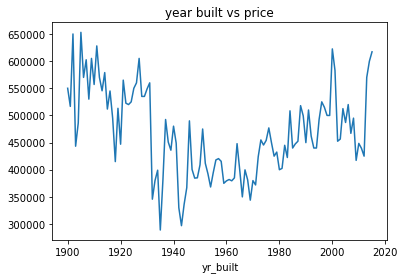

In [29]:
train_data.groupby('yr_built')['price'].median().plot()
plt.title('year built vs price')

comparing the difference between all years variables and price

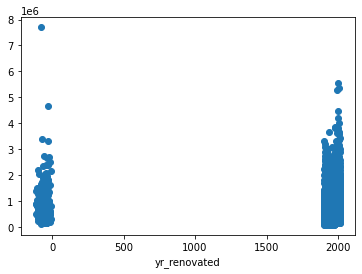

In [30]:
for year in year_features:
    if year != 'yr_built':
        data = train_data.copy()
        data[year] = data['yr_built'] - data[year]
        
        plt.scatter(data[year], data['price'])
        plt.xlabel(year)
        plt.show()

Maybe we need year that was sold or this could be deleted.

checking for the discrete variable 

In [31]:
# for i in numerical_features:
#     print(i, train_data[i].unique(), len(train_data[i].unique()))

In [32]:
discrete_variable = [variable for variable in numerical_features 
                     if len(train_data[variable].unique())<27 and variable not in year_features[0]]
print(len(discrete_variable))

4


In [33]:
discrete_variable

['bedrooms', 'bathrooms', 'floors', 'grade']

In [34]:
train_data[discrete_variable].head()

,bedrooms,bathrooms,floors,grade
0,3,2.50,2.0,8
1,3,2.50,1.0,7
2,5,4.00,2.0,9
3,2,2.00,1.0,7
4,3,2.25,1.0,8


finding the relationship between these variables and price (target variable)

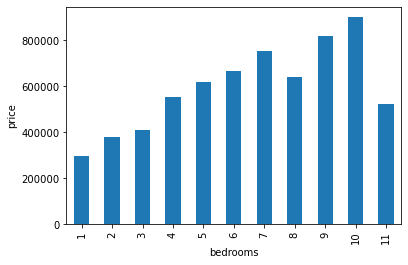

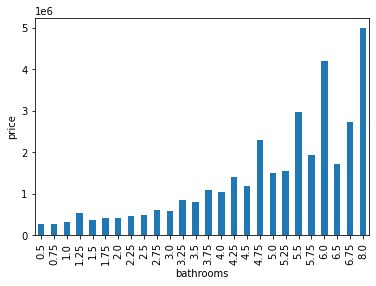

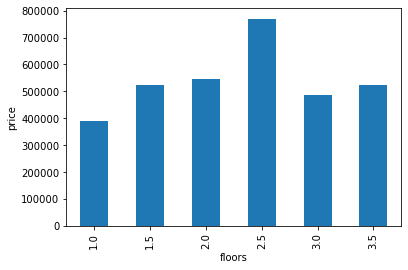

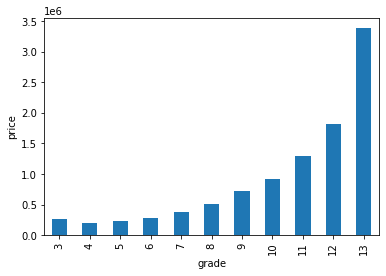

In [35]:
for feature in discrete_variable:
    house_data = train_data.copy()
    house_data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()

### Eureka! There is a relationship between these variables. There is an exponential rise as the grade increase with price also

In regards to the continous variable 

In [36]:
cont_variable = [variable for variable in numerical_features if variable not in discrete_variable
                 and variable not in year_features]

In [37]:
cont_variable

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'bedrooms_bathrooms',
 'sqft_lot_sqft_living',
 'sqft_living_sqft_living15',
 'sqft_living_bedrooms',
 'price']

In [38]:
train_data[cont_variable].head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,price
0,1880,4499,1880,0.0,2130,5114,1.200000,2.393085,0.882629,626.666667,529000.0
1,2020,6564,1310,710.0,1710,5151,1.200000,3.249505,1.181287,673.333333,253000.0
2,4720,493534,3960,760.0,2160,219542,1.250000,104.562288,2.185185,944.000000,745000.0
3,1430,3880,1430,0.0,1430,3880,1.000000,2.713287,1.000000,715.000000,545000.0
4,2270,32112,1740,530.0,2310,41606,1.333333,14.146256,0.982684,756.666667,390000.0


#### To analyse the continous variable, we use histogram to understand the data

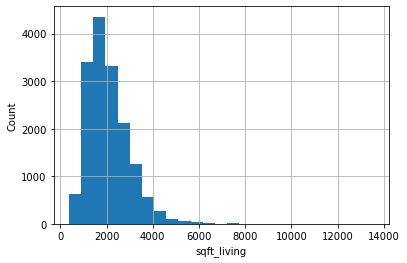

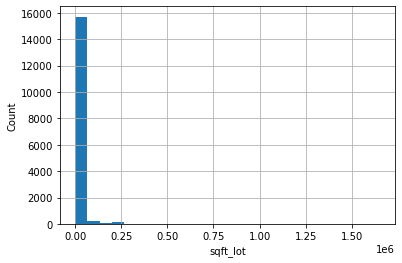

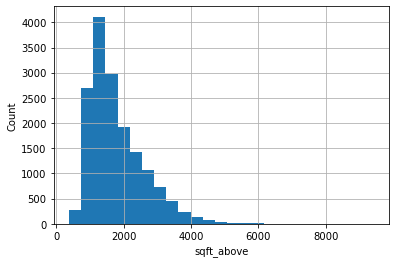

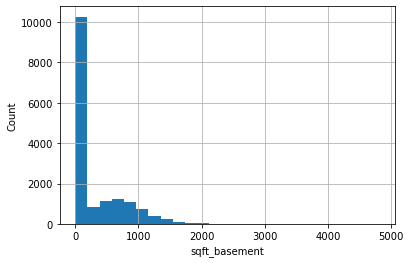

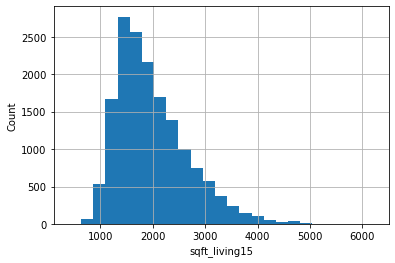

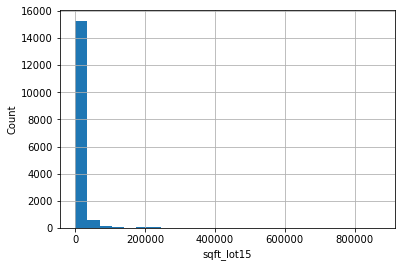

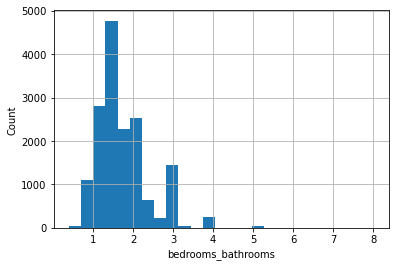

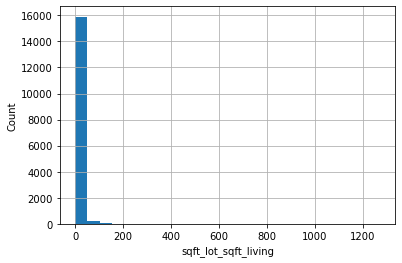

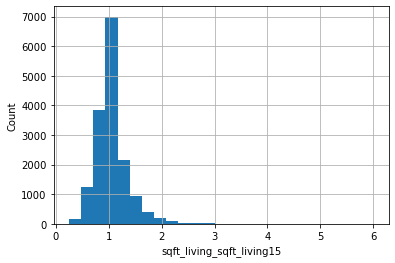

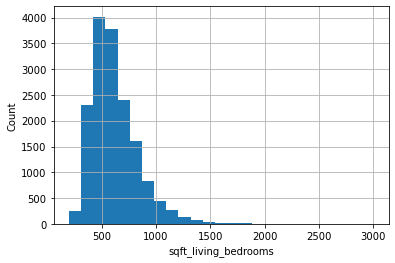

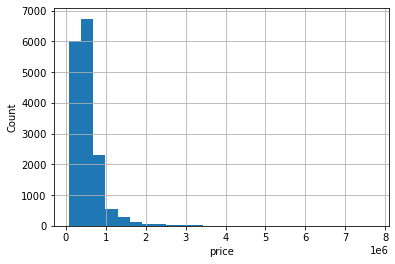

In [39]:
for variable in cont_variable:
    data = train_data.copy()
    data[variable].hist(bins=25)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

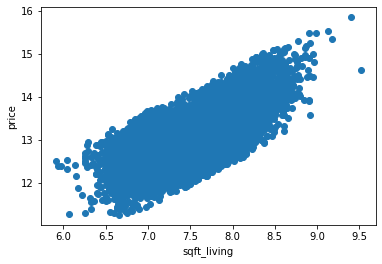

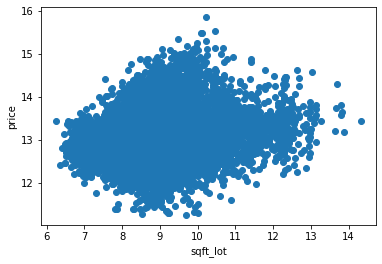

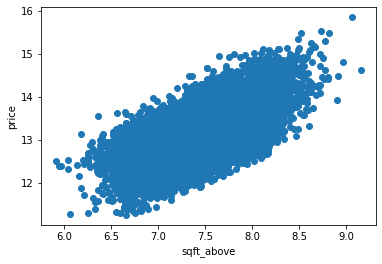

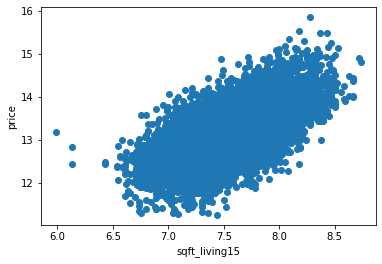

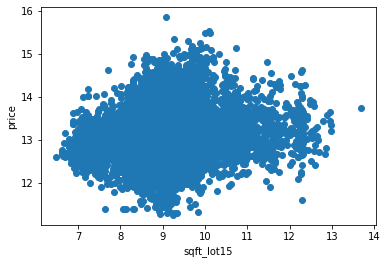

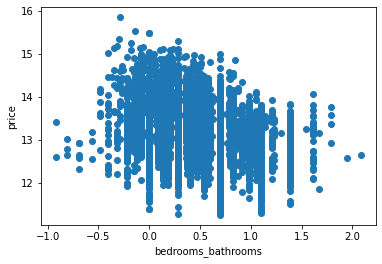

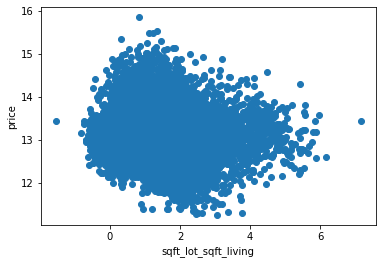

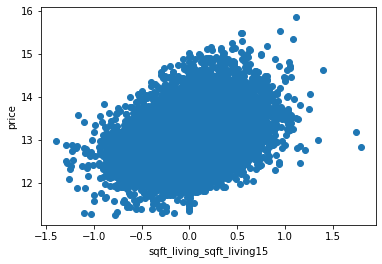

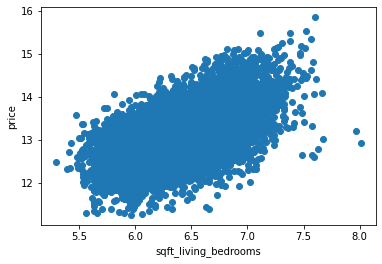

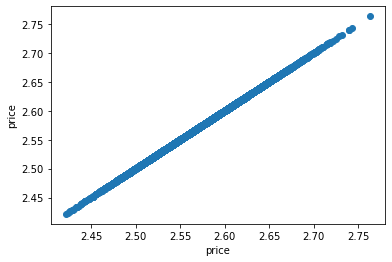

In [40]:
# The continous variable are not distributed because of the ratios to the count
# using a log transformation to standardise them equally


for variable in cont_variable:
    data = train_data.copy()
#     The reason for this next line of code is to capture sqr_basement first entry of 0, as the 
# log of 0 is infinity
    if 0 in data[variable].unique():
        pass
    else:
        data[variable] = np.log(data[variable]) 
        data['price'] = np.log(data['price'])
        plt.scatter(data[variable], data['price'])
        plt.xlabel(variable)
        plt.ylabel('price')
        plt.show()
    
    


### outliers

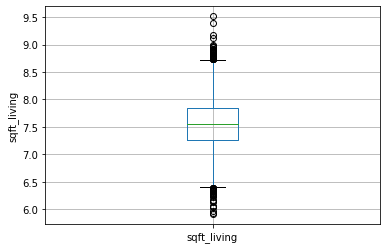

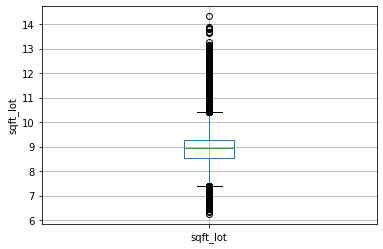

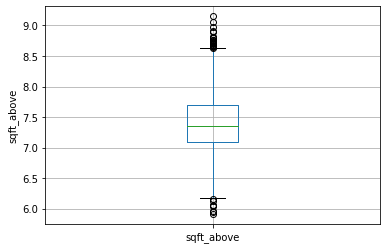

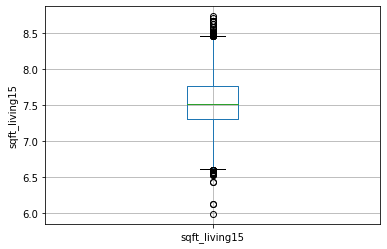

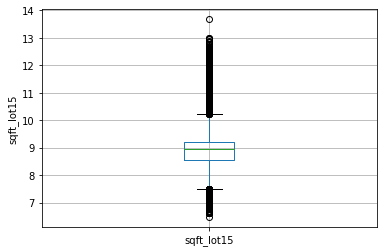

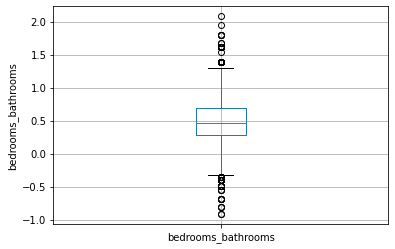

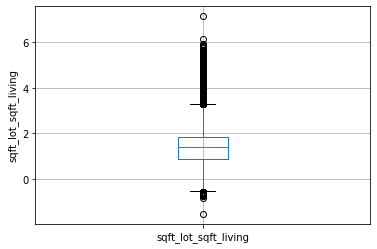

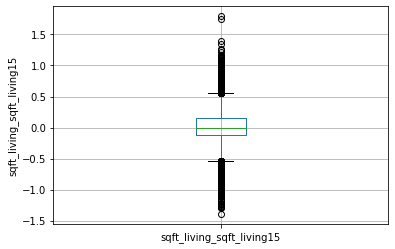

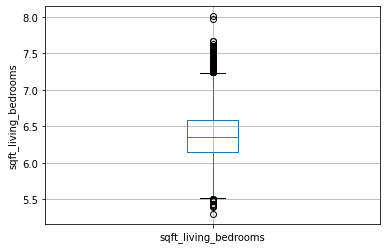

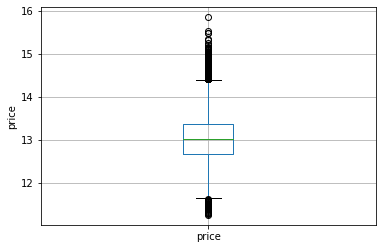

In [41]:
for variable in cont_variable:
    data = train_data.copy()
    if 0 in data[variable].unique():
        pass
    else:
        data[variable] = np.log(data[variable])
        data.boxplot(column=variable)
        plt.ylabel(variable)
        plt.show()

There are quite a few outlier in the cont variable 

#### Categorical variable

In [42]:
cat_variable = [variable for variable in train_data.columns 
                if train_data[variable].dtypes == 'O']
cat_variable

['condition', 'coordinates', 'grade_category']

In [43]:
train_data[cat_variable].head()

,condition,coordinates,grade_category
0,Average,"[47.5664, -121.999]",medium
1,Average,"[47.3545, -122.158]",medium
2,Very Good,"[47.4536, -122.009]",medium
3,Good,"[47.6844, -122.392]",medium
4,Good,"[47.3451, -122.094]",medium


In [44]:
for variable in cat_variable:
    print(f'{variable} and its len: {len(train_data[variable].unique())}')

condition and its len: 5
coordinates and its len: 15761
grade_category and its len: 3


Find the relationship between categorical variable and price

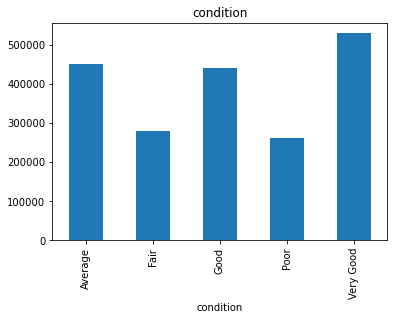

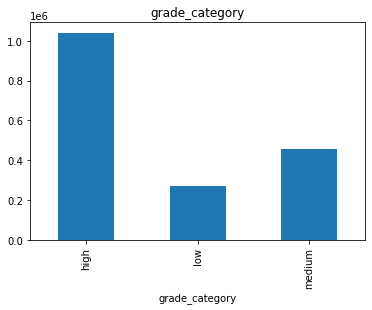

In [45]:
for variable in cat_variable:
    data = train_data.copy()
    if variable == 'coordinates':
        pass
    else:
        data.groupby(variable)['price'].median().plot.bar()
        plt.title(variable)
        plt.show()
        